In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from gurobipy import *
import pickle
from itertools import chain, combinations
import math


In [175]:
df = pd.read_csv("data.csv", sep=";", index_col=0)

In [176]:
df.head()

,Action idea name,Idea avg,Idea stdev,Idea N,Hiilineutraalisuus carbon neutrality (avg),Hiilineutraalisuus (stdev),Hiilineutraalisuus (N),Varautuminen Resilience (avg),Varautuminen (stdev),Varautuminen (N),...,11,12,13,14,15,16,17,18,19,20
Idea #,,,,,,,,,,,,,,,,,,,,,
1,(1) Promoting the energy efficiency of buildin...,"2,45","1,83",11,"2,67","1,89",3,3,"0,82",3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(2) Enabling decentralized energy production f...,"2,3","1,62",10,"2,33","0,47",3,"3,33","0,94",3,...,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,(3) Development and deployment of non-combusti...,"2,4","2,06",10,"3,67","0,47",3,3,"0,82",3,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,(4) Promoting the production of renewable ener...,"2,3","1,85",10,"3,67","0,47",3,"2,33","0,94",3,...,NaN,NaN,NaN,NaN,NaN,NaN,"1, -1",NaN,NaN,NaN
5,(5) Improving energy self-sufficiency to prepa...,2,"1,67",10,"1,33","0,47",3,"3,67","0,47",3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
list(df["Action idea name"]) + ["Number of changed decisions"]

['(1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy',
 '(2) Enabling decentralized energy production from a security of supply perspective',
 '(3) Development and deployment of non-combustion energy technologies and energy storage',
 '(4) Promoting the production of renewable energy, such as wind, geo-energy and solar energy',
 '(5) Improving energy self-sufficiency to prepare for energy supply disruptions',
 '(6) Oil and peat are used only as maintenance security fuels in energy production',
 '(7) Improving the climate resilience of arable farming and forests',
 '(8) Ensuring the sustainable production, use and renewal of biomass',
 '(9) Climate management and use of forests. The growth condition of forests is taken care of and the development of forest carbon balances is monitored',
 '(10) Promoting the development of manure treatment methods and the use of manure for biogas and fertilizer production',
 '(11) Improv

In [178]:
df.columns

Index(['Action idea name', 'Idea avg  ', 'Idea stdev  ', 'Idea N  ',
       'Hiilineutraalisuus carbon neutrality (avg)  ',
       'Hiilineutraalisuus (stdev)  ', 'Hiilineutraalisuus (N)  ',
       'Varautuminen Resilience (avg)  ', 'Varautuminen (stdev)  ',
       'Varautuminen (N)  ', 'Negatiiviset vaikutukset (neg. impact)  (avg)  ',
       'Negatiiviset vaikutukset  (stdev)  ',
       'Negatiiviset vaikutukset  (N)  ', 'Positiiviset vaikutukset (avg)  ',
       'Positiiviset vaikutukset (stdev)  ', 'Positiiviset vaikutukset (N)  ',
       'index', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')

In [179]:
int_col =[str(i) for i in range(1,21)]

In [180]:
pos_subsets = []
neg_subsets = []

for i in range(1,21): #for loop for row
    for j in range(1,21): #for loop for columns
        val = df[int_col].loc[i][str(j)]
        print((i,j))
        print(val)
        if val == 1.0 or val == "1":
            print("pos")
            pos_subsets.append((i-1, j-1))
        elif val == "1, -1" or val == '1, -1 ':
            pos_subsets.append((i-1,j-1))
            neg_subsets.append((i-1,j-1))
        elif val == -1.0 or val == "-1":
            neg_subsets.append((i-1,j-1))
        else:
            pass

(1, 1)
nan
(1, 2)
nan
(1, 3)
nan
(1, 4)
1
pos
(1, 5)
1.0
pos
(1, 6)
1.0
pos
(1, 7)
-1
(1, 8)
nan
(1, 9)
-1
(1, 10)
nan
(1, 11)
nan
(1, 12)
nan
(1, 13)
nan
(1, 14)
nan
(1, 15)
nan
(1, 16)
nan
(1, 17)
nan
(1, 18)
nan
(1, 19)
nan
(1, 20)
nan
(2, 1)
nan
(2, 2)
nan
(2, 3)
1.0
pos
(2, 4)
nan
(2, 5)
1.0
pos
(2, 6)
-1.0
(2, 7)
nan
(2, 8)
nan
(2, 9)
nan
(2, 10)
nan
(2, 11)
nan
(2, 12)
nan
(2, 13)
1
pos
(2, 14)
1.0
pos
(2, 15)
nan
(2, 16)
nan
(2, 17)
nan
(2, 18)
nan
(2, 19)
nan
(2, 20)
nan
(3, 1)
nan
(3, 2)
-1.0
(3, 3)
nan
(3, 4)
1, -1
(3, 5)
nan
(3, 6)
1.0
pos
(3, 7)
nan
(3, 8)
nan
(3, 9)
nan
(3, 10)
nan
(3, 11)
nan
(3, 12)
nan
(3, 13)
nan
(3, 14)
nan
(3, 15)
1.0
pos
(3, 16)
nan
(3, 17)
nan
(3, 18)
nan
(3, 19)
nan
(3, 20)
nan
(4, 1)
nan
(4, 2)
1.0
pos
(4, 3)
nan
(4, 4)
nan
(4, 5)
1.0
pos
(4, 6)
nan
(4, 7)
nan
(4, 8)
nan
(4, 9)
nan
(4, 10)
nan
(4, 11)
nan
(4, 12)
nan
(4, 13)
nan
(4, 14)
nan
(4, 15)
nan
(4, 16)
nan
(4, 17)
1, -1
(4, 18)
nan
(4, 19)
nan
(4, 20)
nan
(5, 1)
nan
(5, 2)
1.0
pos
(5, 3)

In [181]:
class Project:
    def __init__(self, num=0, desc=0, a1=0, a2=0, w=[1/2, 1/2], cost=1):
        self.num = num
        self.desc = desc
        self.a1 = a1
        self.a2 = a2    
        self.cost = cost
        self.w = w
                
    def cal_value(self):
        self.value = (self.a1/4)*self.w[0] + (self.a2/4)*self.w[1]
        
    def describe(self):
        print("Project " + self.desc)
        print("a1: ", self.a1)
        print("a2: ", self.a2)
        print("cost: ", self.cost)
        print("w: ", self.w)
        print("value: ", self.value)
        

In [182]:
project_list = []
for i in range(20):
    r = df.iloc[i]
    
    p = Project(num=i+1)
    p.desc = r["Action idea name"]
    p.a1 = float(r["Hiilineutraalisuus carbon neutrality (avg)  "].replace(',', '.'))
    p.a2 = float(r["Varautuminen Resilience (avg)  "].replace(',', '.'))
    p.pos_impact = float(r["Positiiviset vaikutukset (avg)  "].replace(',', '.'))
    p.neg_impact = float(r["Negatiiviset vaikutukset (neg. impact)  (avg)  "].replace(',', '.'))
    p.cal_value()
    
    project_list.append(p)

In [183]:
effect_dict = {}
for subset in pos_subsets:
    ss_key = tuple(sorted(subset))
    if ss_key in effect_dict:
        effect_dict[ss_key].append(project_list[subset[0]].pos_impact)
    else:
        effect_dict[ss_key] = [project_list[subset[0]].pos_impact]
    
for subset in neg_subsets:
    ss_key = tuple(sorted(subset))
    if ss_key in effect_dict:
        effect_dict[ss_key].append(project_list[subset[0]].neg_impact)
    else:
        effect_dict[ss_key] = [project_list[subset[0]].neg_impact]


In [184]:
effect_dict

{(0, 3): [3.67],
 (0, 4): [3.67],
 (0, 5): [3.67],
 (1, 2): [3.5, -1.5],
 (1, 4): [3.5, 3.0],
 (1, 12): [3.5, 2.67],
 (1, 13): [3.5, 3.33],
 (2, 3): [3.5, -1.5],
 (2, 5): [3.5, -2.33],
 (2, 14): [3.5],
 (1, 3): [3.5],
 (3, 4): [3.5, -0.5],
 (3, 16): [3.5, 3.5, -1.0],
 (2, 4): [3.0],
 (4, 7): [3.0, 4.0],
 (1, 5): [2.33, -0.5],
 (5, 14): [2.33],
 (5, 18): [2.33],
 (0, 6): [4.0, -0.5],
 (6, 8): [4.0, 4.0, -1.0],
 (6, 12): [4.0, 0.0],
 (1, 7): [4.0],
 (7, 12): [4.0],
 (7, 14): [4.0],
 (1, 9): [3.67],
 (4, 9): [3.67],
 (9, 12): [3.67],
 (1, 10): [2.67],
 (4, 10): [2.67],
 (10, 12): [2.67, 2.67],
 (10, 15): [2.67],
 (2, 11): [3.0],
 (4, 12): [2.67],
 (12, 13): [2.67, 3.33],
 (4, 13): [3.33],
 (13, 15): [3.33],
 (1, 14): [3.0],
 (4, 14): [3.0],
 (6, 14): [3.0],
 (12, 14): [3.0],
 (8, 15): [3.5, -2.0],
 (12, 15): [3.5],
 (1, 16): [3.5],
 (6, 17): [2.5, 0.0],
 (12, 17): [2.5],
 (0, 8): [-0.5],
 (4, 5): [-0.5, -2.33],
 (5, 12): [-2.33],
 (7, 17): [-0.33],
 (5, 11): [-0.33],
 (15, 17): [-2.0]}

In [185]:
binary_effect = []

for k, v in effect_dict.items():
    p = 0
    n = 0
    for i in v:
        if i>=0:
            p=1
        else:
            n=1
    
    binary_effect.append(p-n)

In [186]:
for i in range(len(effect_dict)):
    print(list(effect_dict.values())[i])
    print(binary_effect[i])

[3.67]
1
[3.67]
1
[3.67]
1
[3.5, -1.5]
0
[3.5, 3.0]
1
[3.5, 2.67]
1
[3.5, 3.33]
1
[3.5, -1.5]
0
[3.5, -2.33]
0
[3.5]
1
[3.5]
1
[3.5, -0.5]
0
[3.5, 3.5, -1.0]
0
[3.0]
1
[3.0, 4.0]
1
[2.33, -0.5]
0
[2.33]
1
[2.33]
1
[4.0, -0.5]
0
[4.0, 4.0, -1.0]
0
[4.0, 0.0]
1
[4.0]
1
[4.0]
1
[4.0]
1
[3.67]
1
[3.67]
1
[3.67]
1
[2.67]
1
[2.67]
1
[2.67, 2.67]
1
[2.67]
1
[3.0]
1
[2.67]
1
[2.67, 3.33]
1
[3.33]
1
[3.33]
1
[3.0]
1
[3.0]
1
[3.0]
1
[3.0]
1
[3.5, -2.0]
0
[3.5]
1
[3.5]
1
[2.5, 0.0]
1
[2.5]
1
[-0.5]
-1
[-0.5, -2.33]
-1
[-2.33]
-1
[-0.33]
-1
[-0.33]
-1
[-2.0]
-1


In [187]:
effect_dict_binary = dict(zip(effect_dict.keys(), binary_effect))

In [188]:
float(3)

3.0

In [189]:
w = [0.67, 0.33]
for project in project_list:
    project.w = w
    project.cal_value()
    project.describe()

Project (1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy
a1:  2.67
a2:  3.0
cost:  1
w:  [0.67, 0.33]
value:  0.694725
Project (2) Enabling decentralized energy production from a security of supply perspective
a1:  2.33
a2:  3.33
cost:  1
w:  [0.67, 0.33]
value:  0.665
Project (3) Development and deployment of non-combustion energy technologies and energy storage
a1:  3.67
a2:  3.0
cost:  1
w:  [0.67, 0.33]
value:  0.862225
Project (4) Promoting the production of renewable energy, such as wind, geo-energy and solar energy
a1:  3.67
a2:  2.33
cost:  1
w:  [0.67, 0.33]
value:  0.8069500000000001
Project (5) Improving energy self-sufficiency to prepare for energy supply disruptions
a1:  1.33
a2:  3.67
cost:  1
w:  [0.67, 0.33]
value:  0.5255500000000001
Project (6) Oil and peat are used only as maintenance security fuels in energy production
a1:  3.33
a2:  2.33
cost:  1
w:  [0.67, 0.33]
value:  0.75
Project (7) Improvin

In [190]:
class SolveProblem:
    def __init__(self, budget_const_pct, effect_dict, project_list, beta_list):
        self.budget_const_pct = budget_const_pct
        self.effect_dict = effect_dict
        self.beta_list = beta_list
        
        self.m = len(project_list)
        self.project_values = [x.value for x in project_list]
        self.project_costs = [x.cost for x in project_list] 
        
        self.optimal_portfolios = []
        self.optimal_values = []
        
        self.interaction_effects_dict = {}
        
    def run(self):
        
        #A model that generates the first optimal solution
        model = Model("Portfolio opimization - Additive")   

        #Indexes
        projects = range(len(project_list))

        z = []

        for i in projects:
            z.append(model.addVar(vtype=GRB.BINARY, name="z_%d" % (i)))
        model.update()

        #budget constraints
        self.budget = self.budget_const_pct * sum(self.project_costs)

        model.addConstr(quicksum(z[j]*self.project_costs[j] for j in projects) <= self.budget, "Budget Constraint")
        model.update()

        #objective function
        model.setObjective(quicksum(z[j]*self.project_values[j] for j in projects))
        model.modelSense = GRB.MAXIMIZE
        model.update()

        #optimize the model
        model.optimize()

        #Collect optimal decision variables

        sol_dict = {}
        sol_list = model.getVars()
        
        for i in range(self.m):
            sol_dict[sol_list[i].VarName] = sol_list[i].X
        
        self.optimal_portfolios.append(sol_dict)
        self.optimal_values.append(model.objVal)
        
        for beta in self.beta_list:
            
            self.interaction_subsets = []
            self.interaction_effects = []

            for k, v in self.effect_dict.items():
                
                subset = list([k[0], k[1]])
                alpha = v #changed
                u_1 = self.project_values[subset[0]]
                u_2 = self.project_values[subset[1]]

                S_k = alpha*beta*u_1*u_2 #changed
                
                self.interaction_subsets.append(subset)
                self.interaction_effects.append(S_k)
                
            output = np.zeros((len(self.interaction_subsets), 20))
            for i, ix in enumerate(self.interaction_subsets):
                output[i][ix] = 1
            self.interaction_subsets_binary = output.T
            self.interaction_subsets_size = output.sum(axis=1)
            
            self.interaction_effects_dict[beta] = self.interaction_effects
            
                                    
            model = Model("Portfolio optimization - with interaction")

            J = self.m #rename the number of project for the simplicity
            
            #select interaction subsets that should be included in the model
            interaction_subsets = self.interaction_subsets
            interaction_subsets_binary = self.interaction_subsets_binary
            interaction_subsets_size = self.interaction_subsets_size
            interaction_effects= self.interaction_effects
    
            
            #Indexes for the model
            projects = range(J)
            interactions = range(len(self.interaction_subsets))

            #Decision variables z_j
            z = []
            for i in projects:
                z.append(model.addVar(vtype=GRB.BINARY, name="z_%d" % (i)))
            model.update()

            #Decision variable g_k
            g = []
            for k in interactions:
                g.append(model.addVar(vtype=GRB.BINARY, name="g_%d" % (k)))
            model.update()

            #budget constraints
            self.budget = self.budget_const_pct * sum(self.project_costs)

            model.addConstr(quicksum(z[j]*self.project_costs[j] for j in projects) <= self.budget, "Budget Constraint")
            model.update()

            #interaction constraints left hand side
            for k in interactions:
                model.addConstr(quicksum(z[j]*interaction_subsets_binary[j][k] for j in projects) -
                               interaction_subsets_size[k] + 1 <= J*g[k])
            model.update()
            
            #interaction constraints right hand side
            for k in interactions:
                model.addConstr(J*g[k] <= quicksum(z[j]*interaction_subsets_binary[j][k] for j in projects) -
                               interaction_subsets_size[k] + J)
            model.update()
            
            #objective function
            model.setObjective(quicksum(z[j]*self.project_values[j] for j in projects) + quicksum(g[k]*interaction_effects[k] for k in interactions))

            model.modelSense = GRB.MAXIMIZE
            model.update()

            #optimize the model
            model.optimize()

            sol_dict = {}
            sol_list = model.getVars()
            for i in range(J + len(self.interaction_subsets)):
                sol_dict[sol_list[i].VarName] = sol_list[i].X
                
            self.optimal_portfolios.append(sol_dict)
            self.optimal_values.append(model.objVal)
            print("Beta: ", beta)
        
        
        return self.optimal_portfolios

In [191]:
def make_project(w):
    project_list = []
    for i in range(20):
        r = df.iloc[i]

        p = Project(num=i+1)
        p.desc = r["Action idea name"]
        p.a1 = float(r["Hiilineutraalisuus carbon neutrality (avg)  "].replace(',', '.'))
        p.a2 = float(r["Varautuminen Resilience (avg)  "].replace(',', '.'))
        p.pos_impact = float(r["Positiiviset vaikutukset (avg)  "].replace(',', '.'))
        p.neg_impact = float(r["Negatiiviset vaikutukset (neg. impact)  (avg)  "].replace(',', '.'))
        p.w = w
        p.cal_value()

        project_list.append(p)
    return project_list

In [192]:
p1 = make_project([0.5, 0.5])
p2 = make_project([0.67, 0.33])
p3 = make_project([1,0])

In [193]:
s2 = SolveProblem(budget_const_pct=0.5, effect_dict=effect_dict_binary, project_list=p2, beta_list = list(np.arange(0, 0.2, 0.01)) + list(np.arange(0.2, 1, 0.1))+list(np.arange(1,10,1)))
s2.run()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xd73f89d9
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 7.7764000
Presolve removed 1 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 8.33585 7.7764 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.335850000000e+00, best bound 8.335850000000e+00, gap 0.0000%
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Opt

Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xc19c7e54
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 7.7468007

Root relaxation: objective 8.819764e+00, 12 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.81976    0   16    7.74680    8.81976  13.9%     -    0s
H    0     0                       8.6374246    8.81976  2.11%     -    0s
     0     0     cutoff    0         8.63742    8.63742  0

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    9.41840    0   16    7.82693    9.41840  20.3%     -    0s
H    0     0                       9.0537241    9.41840  4.03%     -    0s
     0     0 infeasible    0         9.05372    9.05372  0.00%     -    0s

Cutting planes:
  Gomory: 2
  Cover: 12
  RLT: 5

Explored 1 nodes (51 simplex iterations) in 0.06 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 9.05372 7.82693 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.053724117437e+00, best bound 9.053724117437e+00, gap 0.0000%
Beta:  0.1
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xa2034f24
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective


Cutting planes:
  Gomory: 5
  Cover: 16
  Clique: 1
  RLT: 6

Explored 1 nodes (55 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 9.48902 9.47002 7.90705 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.489023433094e+00, best bound 9.489023433094e+00, gap 0.0000%
Beta:  0.15
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x5ab42a73
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [5e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer 


Root relaxation: objective 1.062253e+01, 23 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   10.62253    0   14    7.98718   10.62253  33.0%     -    0s
H    0     0                       9.9755899   10.62253  6.49%     -    0s
     0     0   10.06596    0    9    9.97559   10.06596  0.91%     -    0s
H    0     0                      10.0302806   10.06596  0.36%     -    0s

Cutting planes:
  Gomory: 8
  Cover: 6
  RLT: 6

Explored 1 nodes (75 simplex iterations) in 0.07 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 10.0303 9.97559 7.98718 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.003028059413e+01, best bound 1.003028059413e+01, gap 0.0000%
Beta:  0.2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical pr

  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.7884352

Root relaxation: objective 1.764034e+01, 36 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   17.64034    0   13    8.78844   17.64034   101%     -    0s
H    0     0                      15.4301820   17.64034  14.3%     -    0s
     0     0   16.51145    0    9   15.43018   16.51145  7.01%     -    0s
H    0     0                      15.4629196   16.51145  6.78%     -    0s
     0     0   16.36657    0   18   15.46292   16.36657  5.84%     -    0s



     0     0   36.32848    0   13   21.32079   36.32848  70.4%     -    0s
H    0     0                      30.0137342   36.32848  21.0%     -    0s
H    0     0                      31.5286643   36.32848  15.2%     -    0s
     0     0   32.83329    0    6   31.52866   32.83329  4.14%     -    0s
     0     0   32.24894    0    2   31.52866   32.24894  2.28%     -    0s
     0     0   31.72175    0    2   31.52866   31.72175  0.61%     -    0s

Cutting planes:
  Gomory: 5
  Cover: 10
  RLT: 4

Explored 1 nodes (70 simplex iterations) in 0.05 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 31.5287 30.0137 21.3208 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.152866434250e+01, best bound 3.152866434250e+01, gap 0.0000%
Beta:  2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzero

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  108.37810    0   10   55.18175  108.37810  96.4%     -    0s
H    0     0                      91.6190752  108.37810  18.3%     -    0s
     0     0   94.57589    0   20   91.61908   94.57589  3.23%     -    0s
     0     0   93.17306    0    3   91.61908   93.17306  1.70%     -    0s
     0     0     cutoff    0        91.61908   91.61908  0.00%     -    0s

Cutting planes:
  Gomory: 7
  Cover: 9
  RLT: 3

Explored 1 nodes (78 simplex iterations) in 0.38 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 91.6191 55.1817 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.161907519875e+01, best bound 9.161907519875e+01, gap 0.0000%
Beta:  7
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model

[{'z_0': 0.0,
  'z_1': 0.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': 0.0,
  'z_5': 1.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': 0.0,
  'z_11': 1.0,
  'z_12': 0.0,
  'z_13': 0.0,
  'z_14': 1.0,
  'z_15': 0.0,
  'z_16': 0.0,
  'z_17': 0.0,
  'z_18': 1.0,
  'z_19': 0.0},
 {'z_0': -0.0,
  'z_1': -0.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': -0.0,
  'z_5': 1.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': -0.0,
  'z_11': 1.0,
  'z_12': -0.0,
  'z_13': -0.0,
  'z_14': 1.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': 1.0,
  'z_19': -0.0,
  'g_0': -0.0,
  'g_1': -0.0,
  'g_2': -0.0,
  'g_3': -0.0,
  'g_4': -0.0,
  'g_5': -0.0,
  'g_6': -0.0,
  'g_7': 1.0,
  'g_8': 1.0,
  'g_9': 1.0,
  'g_10': -0.0,
  'g_11': -0.0,
  'g_12': -0.0,
  'g_13': -0.0,
  'g_14': -0.0,
  'g_15': -0.0,
  'g_16': 1.0,
  'g_17': 1.0,
  'g_18': -0.0,
  'g_19': 1.0,
  'g_20': -0.0,
  'g_21': -0.0,
  'g_22': -0.0,
  'g_23': 1.0,
  'g_24': -0.0,
  'g_25': -0.0,
  'g_26': 

In [194]:
def draw_table2(p):
    dict_values = []

    for pf in p.optimal_portfolios:
        dict_values.append(list(pf.values())[:20])
    d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
    d3 = pd.DataFrame(d2)
    d3.columns = [round(x, 2) for x in d3.columns]
    d3 = d3.astype(int)
    
    d_list = []

    for col in d3.columns:
        d_list.append(sum(abs(d3[0]-d3[col])))
        
    d3 = d3.append(pd.Series(d_list , index=d3.columns),ignore_index=True)
    d3= d3.set_index(pd.Index(list(df["Action idea name"]) + ["Number of changed decisions"]))
    return d3

In [195]:
may_portfolio = draw_table2(s2)

In [196]:
inter_effect_may = []

for k, val in effect_dict.items():
    #print(k)
    #print(val)
    effect = 0.25*np.mean(val)*uti[k[0]]*uti[k[1]]
    inter_effect_may.append(effect)
    


In [197]:
inter_subset_may = list(effect_dict.keys() )

In [198]:
def cal_add_uti(pf):
    return sum(list((uti*pf for uti, pf in zip(uti, pf))))

def cal_inter_effect(pf, inter_subset, inter_effect):   
    
    total_effect=0
    for i in range(len(inter_subset)):
        (p1, p2) = inter_subset[i]
        if ((pf[p1] == 1) & (pf[p2] == 1)):
            total_effect += inter_effect[i]
            #print((p1, p2))
            #print(inter_effect[i])
            
    return total_effect

In [199]:
beta_trans_may = []

for pair in list(combinations(may_portfolio.columns[1:], 2)):
    pf1= may_portfolio[pair[0]]
    pf2= may_portfolio[pair[1]]

    a = cal_add_uti(pf1)
    b = cal_inter_effect(pf1, inter_subset_may, inter_effect_may)
    a2 = cal_add_uti(pf2)
    b2 = cal_inter_effect(pf2, inter_subset_may, inter_effect_may)
    
    beta_com = (a2-a)/(b-b2)
    if not np.isnan(beta_com):
        beta_trans_may.append(beta_com)

/var/folders/m0/4kgydjmn6590r2xq4gdjzq3m0000gn/T/ipykernel_82039/2470031469.py:12: RuntimeWarning: invalid value encountered in double_scalars
  beta_com = (a2-a)/(b-b2)


In [200]:
beta_list = list(set(beta_trans_may))

In [201]:
s3 = SolveProblem(budget_const_pct=0.5, effect_dict=effect_dict_binary, project_list=p2, beta_list = beta_list)
s3.run()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xd73f89d9
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 7.7764000
Presolve removed 1 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 8.33585 7.7764 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.335850000000e+00, best bound 8.335850000000e+00, gap 0.0000%
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Opt


Root relaxation: objective 1.250910e+01, 23 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   12.50910    0   13    8.20683   12.50910  52.4%     -    0s
H    0     0                      11.4869943   12.50910  8.90%     -    0s
     0     0   11.86562    0    7   11.48699   11.86562  3.30%     -    0s
H    0     0                      11.5287898   11.86562  2.92%     -    0s
     0     0   11.81818    0    7   11.52879   11.81818  2.51%     -    0s
*    0     0               0      11.5802724   11.58027  0.00%     -    0s

Cutting planes:
  Gomory: 8
  Cover: 10
  RLT: 7

Explored 1 nodes (92 simplex iterations) in 0.07 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 5: 11.5803 11.5288 11.487 ... 4.165

Optimal solution found (tolerance 1.00e-04)
Best objective 1.158027243151e+01, best 

Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.5831664

Root relaxation: objective 1.582718e+01, 28 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   15.82718    0   13    8.58317   15.82718  84.4%     -    0s
H    0     0                      14.0929532   15.82718  12.3%     -    0s
     0     0   14.87395    0    7   14.09295   14.87395  5.54%     -    0s
     0     0   14.79229    0    7   14.09295   14.79229  4.96%     -    0s
*    0     0               0      14.3657410   14.3

Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 7.9935253

Root relaxation: objective 1.067562e+01, 22 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   10.67562    0   14    7.99353   10.67562  33.6%     -    0s
H    0     0                      10.0158760   10.67562  6.59%     -    0s
     0     0   10.13889    0   13   10.01588   10.13889  1.23%     -    0s
     0     0   10.08345    0    9   10.01588   10.08345  0.67%     -    0s
*    0     0               0      10.0733168   10.07332  0.00%     -    0s

Cutting planes:
  Gomory: 10
  Cover: 7
  Clique: 6
  MIR: 1
  RLT: 7

Explored 1 nodes (65 simplex iterations) in 0.30 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 10.0733 10.0159 7.99353 4.165 

Optimal solution found (tolerance 1.00e-0

Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.9947793

Root relaxation: objective 1.949137e+01, 37 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   19.49137    0   13    8.99478   19.49137   117%     -    0s
H    0     0                      16.8746573   19.49137  15.5%     -    0s
H    0     0                      17.0473749   19.49137  14.3%     -    0s
H    0     0                      17.4526385   19.49137  11.7%     -    0s
     0     0   17.92304    0   12   17.45264   17.92304  2.70%     -    0s
     0     0     cutoff    0        17.45264   17.45264  0.00%     -    0s

Cutting planes:
  Gomory: 6
  Cover: 14
  MIR: 1
  RLT: 7

E

[{'z_0': 0.0,
  'z_1': 0.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': 0.0,
  'z_5': 1.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': 0.0,
  'z_11': 1.0,
  'z_12': 0.0,
  'z_13': 0.0,
  'z_14': 1.0,
  'z_15': 0.0,
  'z_16': 0.0,
  'z_17': 0.0,
  'z_18': 1.0,
  'z_19': 0.0},
 {'z_0': -0.0,
  'z_1': 1.0,
  'z_2': 1.0,
  'z_3': -0.0,
  'z_4': 1.0,
  'z_5': 0.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': -0.0,
  'z_11': 1.0,
  'z_12': 1.0,
  'z_13': -0.0,
  'z_14': 1.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': -0.0,
  'z_19': -0.0,
  'g_0': 0.0,
  'g_1': 0.0,
  'g_2': 0.0,
  'g_3': 1.0,
  'g_4': 1.0,
  'g_5': 1.0,
  'g_6': 0.0,
  'g_7': 0.0,
  'g_8': 0.0,
  'g_9': 1.0,
  'g_10': 0.0,
  'g_11': 0.0,
  'g_12': -0.0,
  'g_13': 1.0,
  'g_14': 1.0,
  'g_15': 0.0,
  'g_16': 0.0,
  'g_17': 0.0,
  'g_18': -0.0,
  'g_19': 1.0,
  'g_20': 1.0,
  'g_21': 1.0,
  'g_22': 1.0,
  'g_23': 1.0,
  'g_24': 1.0,
  'g_25': 1.0,
  'g_26': 1.0,
  'g_27': 0.0

In [202]:
def integer(l):
    return [int(x) for x in l]

In [203]:
for i in range(len(beta_list)):
    print(beta_list[i])
    pf = integer(list(s3.optimal_portfolios[1:][i].values()))[:20]
    print(pf)
    
    if beta_list[i]<0.2:
        low = math.floor(beta_list[i] * 100)/100.0
        high = round(low + 0.01,2)
        
        print("with_low " + str(low))
        print(pf == list(may_portfolio[low])[:20])
        print("with_high " + str(high))
        print(pf == list(may_portfolio[high])[:20])
    
    else:
        low = math.floor(beta_list[i] * 10)/10.0
        high = round(low + 0.1, 1)
        
        print("with_low" + str(low))
        print(pf == list(may_portfolio[low])[:20])
        print("with_high" + str(high))
        print(pf == list(may_portfolio[high])[:20])
    
    print()
    print()

0.14321372205834676
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
with_low 0.14
False
with_high 0.15
True


0.033840773511335354
[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
with_low 0.03
False
with_high 0.04
True


0.10603913558923883
[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
with_low 0.1
True
with_high 0.11
True


0.1740960323097242
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
with_low 0.17
True
with_high 0.18
True


0.3370667975484586
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
with_low0.3
True
with_high0.4
True


0.24129615365787271
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
with_low0.2
True
with_high0.3
False


0.923744305372836
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0]
with_low0.9
True
with_high1.0
True


0.47934077109014367
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0]
with_low0.4
False
with_high0.5
True


0.27987049043587475
[0, 1, 1, 0, 1, 0, 1

In [108]:
s4 = SolveProblem(budget_const_pct=0.5, effect_dict=effect_dict, project_list=p2, beta_list = [1000, 10000, 10000000])
s4.run()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xd73f89d9
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 7.7764000
Presolve removed 1 rows and 20 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 8.33585 7.7764 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.335850000000e+00, best bound 8.335850000000e+00, gap 0.0000%
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Opt

[{'z_0': 0.0,
  'z_1': 0.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': 0.0,
  'z_5': 1.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': 0.0,
  'z_11': 1.0,
  'z_12': 0.0,
  'z_13': 0.0,
  'z_14': 1.0,
  'z_15': 0.0,
  'z_16': 0.0,
  'z_17': 0.0,
  'z_18': 1.0,
  'z_19': 0.0},
 {'z_0': 1.0,
  'z_1': 1.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': 1.0,
  'z_5': 0.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': -0.0,
  'z_9': 1.0,
  'z_10': -0.0,
  'z_11': -0.0,
  'z_12': 1.0,
  'z_13': 0.0,
  'z_14': 1.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': -0.0,
  'z_19': -0.0,
  'g_0': 1.0,
  'g_1': 1.0,
  'g_2': 0.0,
  'g_3': 1.0,
  'g_4': 1.0,
  'g_5': 1.0,
  'g_6': 0.0,
  'g_7': 1.0,
  'g_8': 0.0,
  'g_9': 1.0,
  'g_10': 1.0,
  'g_11': 1.0,
  'g_12': 0.0,
  'g_13': 1.0,
  'g_14': 1.0,
  'g_15': 0.0,
  'g_16': 0.0,
  'g_17': 0.0,
  'g_18': 1.0,
  'g_19': 0.0,
  'g_20': 1.0,
  'g_21': 1.0,
  'g_22': 1.0,
  'g_23': 1.0,
  'g_24': 1.0,
  'g_25': 1.0,
  'g_26': 1.0,
  'g_27': 0.0,
 

In [109]:
s4.optimal_portfolios

[{'z_0': 0.0,
  'z_1': 0.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': 0.0,
  'z_5': 1.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': 0.0,
  'z_11': 1.0,
  'z_12': 0.0,
  'z_13': 0.0,
  'z_14': 1.0,
  'z_15': 0.0,
  'z_16': 0.0,
  'z_17': 0.0,
  'z_18': 1.0,
  'z_19': 0.0},
 {'z_0': 1.0,
  'z_1': 1.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': 1.0,
  'z_5': 0.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': -0.0,
  'z_9': 1.0,
  'z_10': -0.0,
  'z_11': -0.0,
  'z_12': 1.0,
  'z_13': 0.0,
  'z_14': 1.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': -0.0,
  'z_19': -0.0,
  'g_0': 1.0,
  'g_1': 1.0,
  'g_2': 0.0,
  'g_3': 1.0,
  'g_4': 1.0,
  'g_5': 1.0,
  'g_6': 0.0,
  'g_7': 1.0,
  'g_8': 0.0,
  'g_9': 1.0,
  'g_10': 1.0,
  'g_11': 1.0,
  'g_12': 0.0,
  'g_13': 1.0,
  'g_14': 1.0,
  'g_15': 0.0,
  'g_16': 0.0,
  'g_17': 0.0,
  'g_18': 1.0,
  'g_19': 0.0,
  'g_20': 1.0,
  'g_21': 1.0,
  'g_22': 1.0,
  'g_23': 1.0,
  'g_24': 1.0,
  'g_25': 1.0,
  'g_26': 1.0,
  'g_27': 0.0,
 

In [110]:
p10= p2
for project in p10:
    project.value=0
    
p10[0].value

0

In [111]:
s5 = SolveProblem(budget_const_pct=0.5,effect_dict=effect_dict, project_list=p10, beta_list = [1000, 10000, 10000000])
s5.run()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0x2204325f
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective -0.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: -0 
No other solutions better than -0

Optimal solution found (tolerance 1.00e-04)
Best objective -0.000000000000e+00, best bound -0.000000000000e+00, gap 0.0000%
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint

[{'z_0': -0.0,
  'z_1': -0.0,
  'z_2': -0.0,
  'z_3': -0.0,
  'z_4': -0.0,
  'z_5': -0.0,
  'z_6': -0.0,
  'z_7': -0.0,
  'z_8': -0.0,
  'z_9': -0.0,
  'z_10': -0.0,
  'z_11': -0.0,
  'z_12': -0.0,
  'z_13': -0.0,
  'z_14': -0.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': -0.0,
  'z_19': -0.0},
 {'z_0': -0.0,
  'z_1': -0.0,
  'z_2': -0.0,
  'z_3': -0.0,
  'z_4': -0.0,
  'z_5': -0.0,
  'z_6': -0.0,
  'z_7': -0.0,
  'z_8': -0.0,
  'z_9': -0.0,
  'z_10': -0.0,
  'z_11': -0.0,
  'z_12': -0.0,
  'z_13': -0.0,
  'z_14': -0.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': -0.0,
  'z_19': -0.0,
  'g_0': -0.0,
  'g_1': -0.0,
  'g_2': -0.0,
  'g_3': -0.0,
  'g_4': -0.0,
  'g_5': -0.0,
  'g_6': -0.0,
  'g_7': -0.0,
  'g_8': -0.0,
  'g_9': -0.0,
  'g_10': -0.0,
  'g_11': -0.0,
  'g_12': -0.0,
  'g_13': -0.0,
  'g_14': -0.0,
  'g_15': -0.0,
  'g_16': -0.0,
  'g_17': -0.0,
  'g_18': -0.0,
  'g_19': -0.0,
  'g_20': -0.0,
  'g_21': -0.0,
  'g_22': -0.0,
  'g_23': -0.0,
  'g_

In [112]:
s5.optimal_portfolios

[{'z_0': -0.0,
  'z_1': -0.0,
  'z_2': -0.0,
  'z_3': -0.0,
  'z_4': -0.0,
  'z_5': -0.0,
  'z_6': -0.0,
  'z_7': -0.0,
  'z_8': -0.0,
  'z_9': -0.0,
  'z_10': -0.0,
  'z_11': -0.0,
  'z_12': -0.0,
  'z_13': -0.0,
  'z_14': -0.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': -0.0,
  'z_19': -0.0},
 {'z_0': -0.0,
  'z_1': -0.0,
  'z_2': -0.0,
  'z_3': -0.0,
  'z_4': -0.0,
  'z_5': -0.0,
  'z_6': -0.0,
  'z_7': -0.0,
  'z_8': -0.0,
  'z_9': -0.0,
  'z_10': -0.0,
  'z_11': -0.0,
  'z_12': -0.0,
  'z_13': -0.0,
  'z_14': -0.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': -0.0,
  'z_19': -0.0,
  'g_0': -0.0,
  'g_1': -0.0,
  'g_2': -0.0,
  'g_3': -0.0,
  'g_4': -0.0,
  'g_5': -0.0,
  'g_6': -0.0,
  'g_7': -0.0,
  'g_8': -0.0,
  'g_9': -0.0,
  'g_10': -0.0,
  'g_11': -0.0,
  'g_12': -0.0,
  'g_13': -0.0,
  'g_14': -0.0,
  'g_15': -0.0,
  'g_16': -0.0,
  'g_17': -0.0,
  'g_18': -0.0,
  'g_19': -0.0,
  'g_20': -0.0,
  'g_21': -0.0,
  'g_22': -0.0,
  'g_23': -0.0,
  'g_

In [64]:
draw_table2(s2)

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.90,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00
"(1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy",0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
(2) Enabling decentralized energy production from a security of supply perspective,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
(3) Development and deployment of non-combustion energy technologies and energy storage,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(4) Promoting the production of renewable energy, such as wind, geo-energy and solar energy",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
(5) Improving energy self-sufficiency to prepare for energy supply disruptions,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
(6) Oil and peat are used only as maintenance security fuels in energy production,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
(7) Improving the climate resilience of arable farming and forests,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(8) Ensuring the sustainable production, use and renewal of biomass",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
(9) Climate management and use of forests. The growth condition of forests is taken care of and the development of forest carbon balances is monitored,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
(10) Promoting the development of manure treatment methods and the use of manure for biogas and fertilizer production,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [60]:
d_list = []

for col in d2.columns:
    d_list.append(sum(abs(d2[0]-d2[col])))

d3 = d2.append(pd.Series(d_list , index=d2.columns),ignore_index=True)
d3= d3.set_index(pd.Index(list(df["Action idea name"]) + ["Number of changed decisions"]))
d3.style.applymap(lambda x: "background-color: green" if x>0 else "background-color: white")

,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
"(1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
(2) Enabling decentralized energy production from a security of supply perspective,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
(3) Development and deployment of non-combustion energy technologies and energy storage,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"(4) Promoting the production of renewable energy, such as wind, geo-energy and solar energy",1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
(5) Improving energy self-sufficiency to prepare for energy supply disruptions,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
(6) Oil and peat are used only as maintenance security fuels in energy production,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
(7) Improving the climate resilience of arable farming and forests,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
"(8) Ensuring the sustainable production, use and renewal of biomass",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
(9) Climate management and use of forests. The growth condition of forests is taken care of and the development of forest carbon balances is monitored,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
(10) Promoting the development of manure treatment methods and the use of manure for biogas and fertilizer production,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [38]:
d_list = []

for col in d2.columns:
    d_list.append(sum(abs(d2[0]-d2[col])))

In [46]:
len(d_list)

28

In [25]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


/var/folders/m0/4kgydjmn6590r2xq4gdjzq3m0000gn/T/ipykernel_46270/1982978728.py:3: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


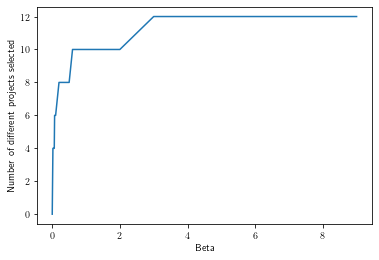

In [195]:
draw_graph(s1)

In [256]:
df = draw_table(s2)

In [257]:
df.style.applymap(lambda x: "background-color: green" if x>0 else "background-color: white")

,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


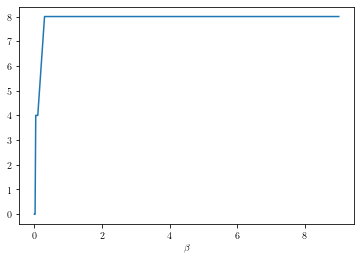

In [237]:
draw_graph(s2)

In [247]:
dict_values = []

for pf in s2.optimal_portfolios:
    dict_values.append(list(pf.values())[:20])
d2 = dict(zip(s2.interaction_effects_dict.keys(), dict_values[1:]))

In [253]:
np.array(d2[0]) - np.array(d2[9])

array([-1., -1.,  0.,  0., -1.,  1.,  0.,  0.,  1.,  0.,  0.,  1., -1.,
       -0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [212]:
def draw_table(p):
    dict_values = []

    for pf in p.optimal_portfolios:
        dict_values.append(list(pf.values())[:20])
    d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
    d3 = pd.DataFrame(d2)
    d3.columns = [round(x, 2) for x in d3.columns]
    d3 = d3.astype(int)
    d3 = d3.set_index(pd.Index(list(range(1,21))))
    return d3

In [255]:
draw_table(s2)

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.90,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [223]:
def draw_graph(p):
    dict_values = []

    for pf in p.optimal_portfolios:
        dict_values.append(list(pf.values())[:20])
    d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
    
    diff_dict = {}
    for k,v in d2.items():
        diff_dict[k] = np.sum(abs(np.array(d2[0])-np.array(v)))
    plt.plot(diff_dict.keys(), diff_dict.values())
    plt.xlabel(r"$\beta$")
    
    plt.ylabel("")

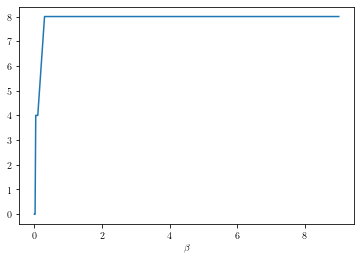

In [262]:
draw_graph(s2)

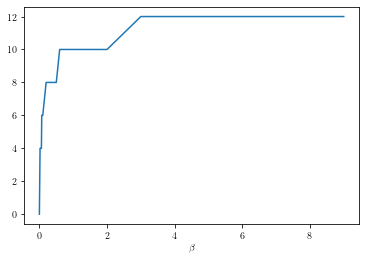

In [261]:
draw_graph(s1)

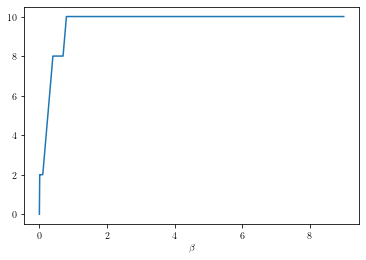

In [263]:
draw_graph(s3)

In [266]:
p1[0].describe()

Project (1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy
a1:  2.67
a2:  3.0
cost:  1
w:  [0.5, 0.5]
value:  0.70875


In [265]:
p2[0].describe()

Project (1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy
a1:  2.67
a2:  3.0
cost:  1
w:  [0.67, 0.33]
value:  0.694725


In [264]:
p3[0].describe()

Project (1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy
a1:  2.67
a2:  3.0
cost:  1
w:  [1, 0]
value:  0.6675


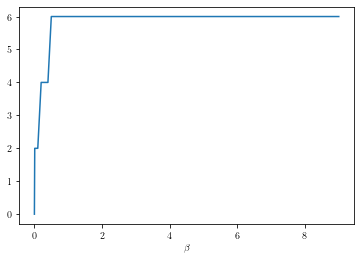

In [227]:
draw_graph(s4)

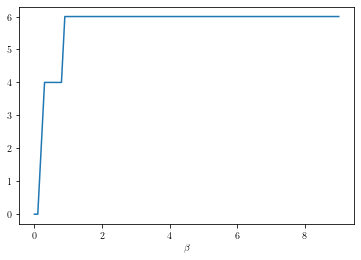

In [228]:
draw_graph(s5)

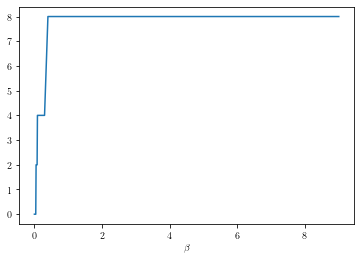

In [231]:
draw_graph(s6)

In [373]:
dict_values = []

for pf in p.optimal_portfolios:
    dict_values.append(list(pf.values())[:20])

In [374]:
d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))

In [375]:
d3 = pd.DataFrame(d2)
d3.columns = [round(x, 1) for x in d3.columns]
d3 = d3.astype(int)

In [376]:
d3.style.applymap(lambda x: "background-color: blue" if x >0 else 'background-color: white')

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [378]:
diff_dict = {}
for k,v in d2.items():
    diff_dict[k] = np.sum(abs(np.array(d2[0])-np.array(v)))

In [219]:
plt.plot(diff_dict.keys(), diff_dict.values())
plt.xlabel("$\beta$")
plt.ylabel("Number of different projects selected")

NameError: name 'diff_dict' is not defined

In [366]:
dict_values = []

for pf in p.optimal_portfolios:
    dict_values.append(list(pf.values())[20:])
    
d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
d3 = pd.DataFrame(d2)
d3.columns = [round(x, 1) for x in d3.columns]
d3 = d3.astype(int)
d3.style.applymap(lambda x: "background-color: blue" if x >0 else 'background-color: white')

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [372]:
np.sum(abs(np.array(d2[0])-np.array(d2[0.1])))

14.0

In [308]:
len(p.interaction_effects_dict.keys())

26

In [314]:
len(p.optimal_portfolios[1:])

26

In [307]:
list(p.optimal_portfolios[13].values())[:20]

[0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 -0.0,
 1.0,
 1.0,
 -0.0,
 1.0,
 1.0,
 1.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0]

In [252]:
np.dot([1,2,3], [0,1,0])

2

In [280]:
p.optimal_portfolios[2]

{'z_0': 0.0,
 'z_1': 1.0,
 'z_2': 1.0,
 'z_3': 0.0,
 'z_4': 1.0,
 'z_5': 0.0,
 'z_6': 1.0,
 'z_7': 1.0,
 'z_8': 1.0,
 'z_9': 1.0,
 'z_10': -0.0,
 'z_11': 1.0,
 'z_12': 1.0,
 'z_13': 0.0,
 'z_14': 1.0,
 'z_15': -0.0,
 'z_16': -0.0,
 'z_17': -0.0,
 'z_18': -0.0,
 'z_19': -0.0,
 'g_0': 0.0,
 'g_1': 0.0,
 'g_2': 0.0,
 'g_3': 1.0,
 'g_4': 1.0,
 'g_5': 1.0,
 'g_6': 0.0,
 'g_7': 0.0,
 'g_8': 0.0,
 'g_9': 1.0,
 'g_10': 0.0,
 'g_11': 0.0,
 'g_12': -0.0,
 'g_13': 1.0,
 'g_14': 1.0,
 'g_15': -0.0,
 'g_16': 0.0,
 'g_17': 0.0,
 'g_18': 0.0,
 'g_19': 1.0,
 'g_20': 1.0,
 'g_21': 1.0,
 'g_22': 1.0,
 'g_23': 1.0,
 'g_24': 1.0,
 'g_25': 1.0,
 'g_26': 1.0,
 'g_27': 0.0,
 'g_28': 0.0,
 'g_29': 0.0,
 'g_30': 0.0,
 'g_31': 1.0,
 'g_32': 1.0,
 'g_33': 0.0,
 'g_34': 0.0,
 'g_35': -0.0,
 'g_36': 1.0,
 'g_37': 1.0,
 'g_38': 1.0,
 'g_39': 1.0,
 'g_40': 0.0,
 'g_41': -0.0,
 'g_42': 0.0,
 'g_43': -0.0,
 'g_44': 0.0,
 'g_45': 0.0,
 'g_46': -0.0,
 'g_47': 0.0,
 'g_48': -0.0,
 'g_49': 0.0,
 'g_50': -0.0}

In [289]:
x = np.dot(list(p.optimal_portfolios[3].values())[:20], p.project_values)
y = np.dot(list(p.optimal_portfolios[3].values())[20:], p.interaction_effects_dict[0.2])
x+y

10.133728697916666

In [270]:
p.optimal_values

[8.33375,
 8.33375,
 9.140551997981774,
 10.13372869791667,
 11.179968046875,
 12.263572528906247,
 13.371340661132812,
 14.479108793359377,
 15.586876925585937,
 16.6946450578125,
 17.802413190039065,
 18.910181322265625]